### "PROBLEM STATEMENT"::Using Tensorflow tool, how can you detect spam emails automatically so the user’s inbox remains clean? Perform EDA on dataset to detect spam mail.

#### Detecting spam emails using traditional machine learning techniques and libraries like scikit-learn. It covers steps such as Exploratory Data Analysis (EDA), feature engineering, handling imbalanced datasets, NLP techniques, algorithm selection, and evaluation metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### LOADING THE DATASET

In [2]:
df=pd.read_csv("spam emails dataset.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EXPLORATORY DATA ANALYSIS

In [3]:
# Understand the structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [4]:
# Checking for missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
# Explore the distribution of classes
print(df['Category'].value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


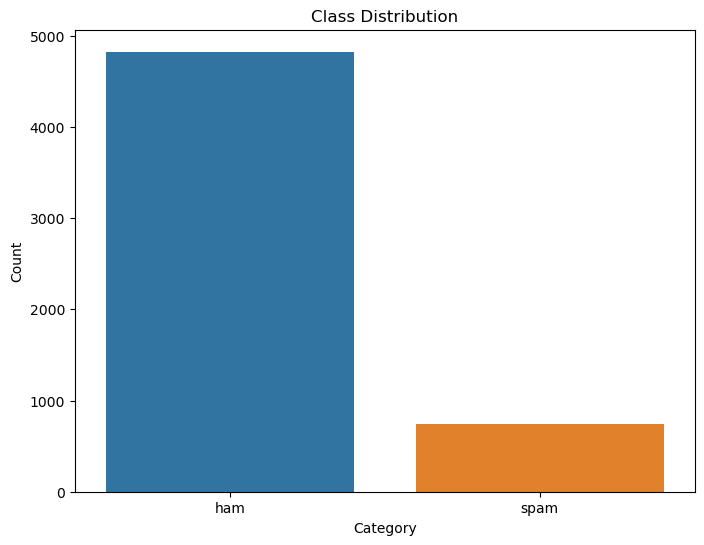

In [6]:
## Visualize the distribution of classes (spam vs. non-spam emails)
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [7]:
# Analyze the distribution of text lengths
df['Text_Length'] = df['Message'].apply(len)
print(df.groupby('Category')['Text_Length'].describe())

           count       mean        std  min    25%    50%    75%    max
Category                                                               
ham       4825.0   71.44829  58.434864  2.0   33.0   52.0   93.0  910.0
spam       747.0  137.98929  29.980287  7.0  132.0  149.0  157.0  223.0


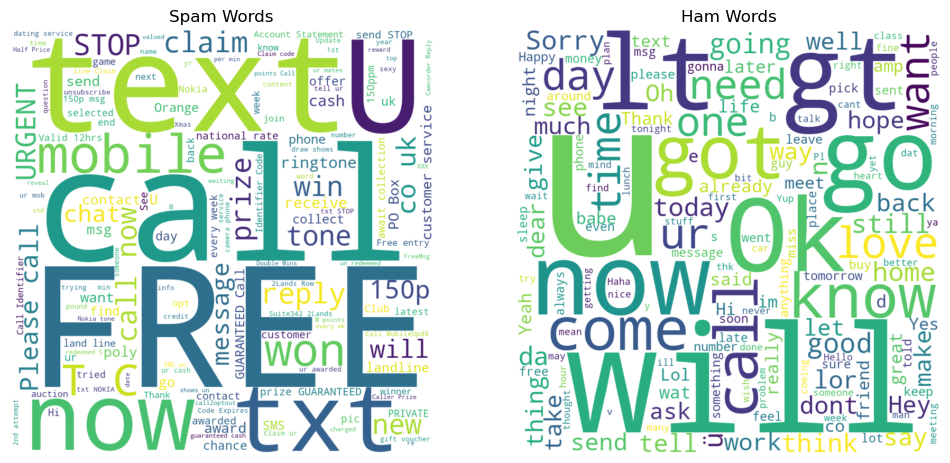

In [8]:
# Word Cloud
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_words = ' '.join(list(df[df['Category'] == 'spam']['Message']))
ham_words = ' '.join(list(df[df['Category'] == 'ham']['Message']))

spam_wc = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(spam_words)
ham_wc = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(ham_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Ham Words')
plt.axis('off')

plt.show()

### FEATURE ENGINEERING FOR EMAIL TEXT 

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to C:\Users\Bisma
[nltk_data]     Bashir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Bisma
[nltk_data]     Bashir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Bisma
[nltk_data]     Bashir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['Processed_Message'] = df['Message'].apply(preprocess_text)

### HANDLING IMBALANCED DATASET

In [11]:
from sklearn.utils import resample

# Separate minority and majority classes
spam = df[df['Category'] == 'spam']
ham = df[df['Category'] == 'ham']

# Upsample minority class
spam_upsampled = resample(spam, replace=True, n_samples=len(ham), random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([ham, spam_upsampled])

### SPLITTING THE DATA

In [12]:
# Split the dataset into training and testing sets while maintaining the class distribution
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_upsampled['Processed_Message'], df_upsampled['Category'], test_size=0.2, random_state=42)


### NLP TECHNIQUE

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Applying TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

### ALGORITHM SELECTION AND TRAINING THE MODEL

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=1.0, fit_prior=False))
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB(fit_prior=False))])

### EVALUATION METRICS 

In [15]:
from sklearn.metrics import classification_report

# Predictions
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.97      0.98       985
        spam       0.97      0.98      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



### providing the two  emails to detect which one is Ham and which Spam

In [18]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [19]:
model.predict(emails)

array(['ham', 'spam'], dtype='<U4')

In [20]:
### checking the accuracy score
model.score(X_test,y_test)

0.977720207253886

#### Detecting spam emails using the Tensorflow which is typically used for building neural network models, including deep learning models like Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs). These models can be used for text classification tasks such as spam detection.

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [22]:
# Explore the distribution of classes
print(df['Category'].value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


#### handling class imbalance

In [27]:
df_spam = df[df['Category'] == 'spam']
df_non_spam = df[df['Category'] == 'ham']

# Upsample the minority class (spam) to address class imbalance
df_spam_upsampled = resample(df_spam, replace=True, n_samples=len(df_non_spam), random_state=42)
df_upsampled = pd.concat([df_non_spam, df_spam_upsampled])


In [30]:
# Checking if df_upsampled is created properly
print(df_upsampled['Category'].value_counts())

Category
ham     4825
spam    4825
Name: count, dtype: int64


In [28]:
df_upsampled

,Category,Message,Text_Length,Processed_Message
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
3,ham,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goes usf lives around though
6,ham,Even my brother is not like to speak with me. ...,77,even brother like speak treat like aids patent
...,...,...,...,...
4248,spam,Text PASS to 69669 to collect your polyphonic ...,105,text pass collect polyphonic ringtones normal ...
3675,spam,You have won a Nokia 7250i. This is what you g...,150,nokia get win free auction take part send noki...
3620,spam,8007 25p 4 Alfie Moon's Children in Need song ...,165,p alfie moons children need song ur mob tell u...
3501,spam,Dorothy@kiefer.com (Bank of Granite issues Str...,156,dorothykiefercom bank granite issues strongbuy...


In [29]:
# Preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords (assuming you have downloaded NLTK stopwords)
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df_upsampled['Processed_Message'] = df_upsampled['Message'].apply(preprocess_text)


#### Split the dataset into train and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled['Processed_Message'], df_upsampled['Category'], test_size=0.2, random_state=42)


In [35]:
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_length = max([len(seq) for seq in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

#### Define the neural network model

In [38]:
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=max_length),
    LSTM(64),
    Dense(1, activation='sigmoid')
])


C:\Users\Bisma Bashir\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


#### compile and train the model

In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
